In [2]:
pip install numpy matplotlib scikit-learn


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 8.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 6.0 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


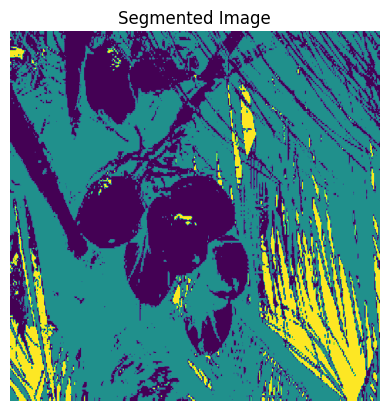

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from PIL import Image

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename))
        img = img.convert('RGB')  # Convert to RGB if necessary
        img = np.array(img)
        images.append(img)
    return images

# Replace 'train', 'test', and 'valid' with your actual folder names
train_folder = '/home/ashwathama/Documents/GitHub/agritech/On-tree mature coconut fruit detection.v1i.multiclass/train'
test_folder = '/home/ashwathama/Documents/GitHub/agritech/On-tree mature coconut fruit detection.v1i.multiclass/test'
valid_folder = '/home/ashwathama/Documents/GitHub/agritech/On-tree mature coconut fruit detection.v1i.multiclass/valid'

# Load images from each folder
train_images = load_images_from_folder(train_folder)
test_images = load_images_from_folder(test_folder)
valid_images = load_images_from_folder(valid_folder)

# Concatenate images into a single array
train_images_reshaped = [img.reshape((-1, 3)) for img in train_images]
all_images = np.concatenate(train_images_reshaped)

# Apply K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(all_images)

# Segment a specific image (e.g., the first test image)
test_image = test_images[0]

# Get the height and width of the test image
height, width, _ = test_image.shape

# Predict cluster labels for each pixel
predicted_labels = kmeans.predict(test_image.reshape((-1, 3)))

# Reshape the predicted labels back to the original spatial dimensions (height, width)
segmented_image = predicted_labels.reshape((height, width))

# Display the segmented image
plt.imshow(segmented_image, cmap='viridis')
plt.title('Segmented Image')
plt.axis('off')
plt.show()


In [1]:
!pip install librosa


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [1]:
pip install librosa

  Using cached librosa-0.10.2.post1-py3-none-any.whl.metadata (8.6 kB)
  Using cached audioread-3.0.1-py3-none-any.whl.metadata (8.4 kB)
  Using cached numpy-2.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached scipy-1.14.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached scikit_learn-1.6.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached numba-0.60.0-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (2.7 kB)
  Using cached soundfile-0.12.1-py2.py3-none-manylinux_2_31_x86_64.whl.metadata (14 kB)
  Using cached pooch-1.8.2-py3-none-any.whl.metadata (10 kB)
  Using cached soxr-0.5.0.post1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
  Using cached lazy_loader-0.4-py3-none-any.whl.metadata (7.6 kB)
  Using cached msgpack-1.1.0-cp310-cp310-manylinux_2_1

In [2]:
pip install pyaudioanalysis


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 MB 2.5 MB/s eta 0:00:00a 0:00:01m
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyaudioanalysis: filename=pyAudioAnalysis-0.3.14-py3-none-any.whl size=41411605 sha256=7b8567896400c292bb1e24d3e5c6f5b8785effbcfad430d5cdc9f57382423ccb
  Stored in directory: /home/ashwathama/.cache/pip/wheels/a7/54/73/fa830689c2440d2c81ff175c60e374930ad1607a8881e0f43f
Successfully built pyaudioanalysis
Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install eyed3 pydub matplotlib tqdm openpyxl

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
import numpy as np
import pandas as pd
import librosa
from pyAudioAnalysis import audioBasicIO, ShortTermFeatures

# Define the root folder containing subfolders of audio files
folder = r"/home/ashwathama/Documents/GitHub/agritech/audio"

# Prepare a list to hold data for all audio files
dataALL = []

# Duration to process (in seconds)
durationToProcess = 120  # Change this to the desired duration (in seconds)

# Iterate over each subfolder and file in the root folder
for subfolder, dirs, files in os.walk(folder):
    genre = os.path.basename(subfolder)  # Use the subfolder name as the genre
    for file in files:
        if file.endswith(".mp3"):  # Only process .mp3 files
            audioFilepath = os.path.join(subfolder, file)
            print(f"Processing file: {audioFilepath}")

            # Load the audio file using librosa
            try:
                x, Fs = librosa.load(audioFilepath, sr=None, mono=True, duration=durationToProcess)
            except Exception as e:
                print(f"Error reading {audioFilepath}: {e}")
                continue

            if x.size == 0:
                print(f"Warning: Skipping empty audio file {audioFilepath}")
                continue

            # Extract short-term features using pyAudioAnalysis
            F, f_name = ShortTermFeatures.feature_extraction(x, Fs, 0.050 * Fs, 0.025 * Fs)

            # Calculate the means of the features
            feature_means = {name: F[i, :].mean() for i, name in enumerate(f_name)}

            # Additional features using librosa
            try:
                # Onset detection
                onset_env = librosa.onset.onset_strength(y=x, sr=Fs)
                onsets = len(librosa.onset.onset_detect(y=x, sr=Fs))
                feature_means['Onsets'] = onsets

                # Harmonic and percussive components
                harmonic, percussive = librosa.effects.hpss(x)
                feature_means['Harmonic Mean'] = np.mean(harmonic)
                feature_means['Percussive Mean'] = np.mean(percussive)

                # CQT (Constant-Q Transform)
                cqt = librosa.cqt(x, sr=Fs)
                feature_means['CQT Mean'] = np.mean(np.abs(cqt))

                # Beat Synchronization
                mfcc = librosa.feature.mfcc(y=x, sr=Fs)
                tempo, beat_frames = librosa.beat.beat_track(y=x, sr=Fs)
                beat_mfcc = librosa.util.sync(mfcc, beat_frames, aggregate=np.mean)
                feature_means['Beat Sync MFCC Mean'] = np.mean(beat_mfcc)

                # Rhythm Complexity
                fourier_tempogram = librosa.feature.fourier_tempogram(y=x, sr=Fs)
                rhythm_complexity = np.mean(fourier_tempogram)
                feature_means['Rhythm Complexity'] = rhythm_complexity

                # Additional Harmonic/Pitch Features
                # Spectral Centroid
                spectral_centroid = librosa.feature.spectral_centroid(y=x, sr=Fs)
                feature_means['Spectral Centroid Mean'] = np.mean(spectral_centroid)

                # Spectral Rolloff
                spectral_rolloff = librosa.feature.spectral_rolloff(y=x, sr=Fs, rolloff=0.85)
                feature_means['Spectral Rolloff Mean'] = np.mean(spectral_rolloff)

                # Chroma Features
                chroma = librosa.feature.chroma_stft(y=x, sr=Fs)
                feature_means['Chroma Mean'] = np.mean(chroma)

                # MFCC Delta (1st derivative)
                mfcc_delta = librosa.feature.delta(mfcc)
                feature_means['MFCC Delta Mean'] = np.mean(mfcc_delta)

                # MFCC Delta-Delta (2nd derivative)
                mfcc_delta2 = librosa.feature.delta(mfcc, order=2)
                feature_means['MFCC Delta-Delta Mean'] = np.mean(mfcc_delta2)

            except Exception as e:
                print(f"Error extracting additional features for {audioFilepath}: {e}")
                feature_means['Onsets'] = 0
                feature_means['Harmonic Mean'] = 0
                feature_means['Percussive Mean'] = 0
                feature_means['CQT Mean'] = 0
                feature_means['Beat Sync MFCC Mean'] = 0
                feature_means['Rhythm Complexity'] = 0
                feature_means['Spectral Centroid Mean'] = 0
                feature_means['Spectral Rolloff Mean'] = 0
                feature_means['Chroma Mean'] = 0
                feature_means['MFCC Delta Mean'] = 0
                feature_means['MFCC Delta-Delta Mean'] = 0

            # Extract tempogram and compute tempo
            try:
                tempo = librosa.feature.rhythm.tempo(onset_envelope=onset_env, sr=Fs)[0]  # Updated method
                feature_means['Tempo'] = tempo

                # Extract Tempogram
                tempogram = librosa.feature.tempogram(y=x, sr=Fs)
                feature_means['Tempogram Mean'] = np.mean(tempogram)

            except Exception as e:
                print(f"Error extracting tempo/tempogram for {audioFilepath}: {e}")
                feature_means['Tempo'] = 0
                feature_means['Tempogram Mean'] = 0

            # Add genre and file name to the feature dictionary
            feature_means['Genre'] = genre
            feature_means['File Name'] = file

            # Append the data to the list
            dataALL.append(feature_means)

# Create a DataFrame from the list of feature data
df = pd.DataFrame(dataALL)

# Set display options to avoid scientific notation
pd.set_option('display.float_format', '{:.15f}'.format)

# Save the DataFrame to an Excel file
output_filepath = r"/home/ashwathama/Documents/GitHub/agritech/audio.xlsx"
df.to_excel(output_filepath, index=False)

print(f"Features for all audio files saved to {output_filepath}")


Processing file: /home/ashwathama/Documents/GitHub/agritech/audio/matureCocoAudio/Mature.mp3
Processing file: /home/ashwathama/Documents/GitHub/agritech/audio/tenderCocoAudio/Tender.mp3
Features for all audio files saved to /home/ashwathama/Documents/GitHub/agritech/audio.xlsx
